In [1]:
import csv
from csv import *
import statistics
from statistics import *
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    return exampleData

In [2]:
def get_mapping(filename):
    test = process_csv(filename)
    lookup = {}
    for row in test:
        lookup[row[0]] = row[1]
    return lookup

def get_raw_movies(filename):

    base = process_csv(filename)
    head = base[0]
    data = base[1:]
    mov = []

    for j in range(len(data)):
        datum = {}
        for i in head:
            if i in ["directors", "actors", "genres"]:
                datum[i] = data[j][head.index(i)].split(",")
            elif i == "year":
                datum[i] = int(data[j][head.index(i)])
            elif i == "rating":
                datum[i] = float(data[j][head.index(i)])
            else:
                datum[i] = data[j][head.index(i)]
        mov.append(datum)
    return mov

def get_movies(movies_path, mapping_path):
    mov = get_raw_movies(movies_path)
    mapping = get_mapping(mapping_path)

    for i in mov:
        i["title"] = mapping[i["title"]]
        dirList = []
        for j in i["directors"]:
            dirList.append(mapping[j])
        i["directors"] = dirList
        actList = []
        for k in i["actors"]:
            actList.append(mapping[k])
        i["actors"] = actList
    return mov

# Function provided by project8, donut touch
def filter_movies_by_year(movies, year):
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies

def hits(movies,section,dump=False):
    data = []
    for i in movies:
        for j in i[section]:
            if j in data:
                continue
            data.append(j)
    if dump:
        return data
    else:
        return len(data)

def dump(movies,section,dedupe=False):
    data = []
    for i in movies:
        if i[section] not in data and dedupe:
            data.append(i[section])
        elif not dedupe:
            data.append(i[section])
    return data

def bucketize(movie_list, movie_key):
    buckets = {}

    if type(movie_list[0][movie_key]) == list:
        bucketIdx = hits(movie_list,movie_key,True)
        for i in bucketIdx:
            contents = []

            for j in movie_list:
                if i in j[movie_key]:
                    contents.append(j)
            buckets[i] = contents
    else:
        bucketIdx = dump(movie_list,movie_key,True)
       # for i in movie_list:
            #if i[movie_key]
        for i in bucketIdx:
            contents = []

            for j in movie_list:
                if str(i).upper() == str(j[movie_key]).upper():
                    contents.append(j)
            buckets[i] = contents
    return buckets


In [3]:
#q1
smap = get_mapping("small_mapping.csv")
smap

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [4]:
#q2
smap["nm0001219"]

'Gary Fleder'

In [5]:
#q3
names = []
for i in list(smap):
    if i[0] =='n':
        names.append(smap[i])
names

['John Cusack',
 'Mel Gibson',
 'Dustin Hoffman',
 'Danny Glover',
 'Gene Hackman',
 'Gary Busey',
 'Richard Donner',
 'Gary Fleder',
 'Mitchell Ryan']

In [6]:
#q4
q4list = []
q4list2 = []
for i in names:
    if " G" in i:
        q4list.append(i)
for i in q4list:
    for j in list(smap):
        if smap[j] == i:
            q4list2.append(j)
q4list2

['nm0000154', 'nm0000418']

In [7]:
#q5
smov = get_raw_movies("small_movies.csv")
smov

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [8]:
#q6
len(smov[1]["actors"])

4

In [9]:
#q7
smov[0]["actors"][0]

'nm0000131'

In [10]:
#q8
small = get_movies("small_movies.csv", "small_mapping.csv")
movies = get_movies("movies.csv", "mapping.csv")
small[1]["title"]

'Lethal Weapon'

In [11]:
#q9
small[0]["actors"]

['John Cusack', 'Gene Hackman', 'Dustin Hoffman']

In [12]:
#q10
small[-1]["directors"]

['Richard Donner']

In [13]:
#q11
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [14]:
#q12
movies[0:2]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']}]

In [15]:
#q13
mov = movies.copy()
filter_movies_by_year(mov,1929)

[{'title': 'Redskin',
  'year': 1929,
  'rating': 7.0,
  'directors': ['Victor Schertzinger'],
  'actors': ['Richard Dix', 'Tully Marshall', 'George Regas'],
  'genres': ['Adventure', 'Drama', 'Western']},
 {'title': 'The Girl in the Show',
  'year': 1929,
  'rating': 6.5,
  'directors': ['Edgar Selwyn'],
  'actors': ['Raymond Hackett', 'Edward J. Nugent'],
  'genres': ['Comedy']},
 {'title': 'Atlantic',
  'year': 1929,
  'rating': 5.5,
  'directors': ['Ewald André Dupont'],
  'actors': ['Franklin Dyall', 'John Stuart'],
  'genres': ['Drama']}]

In [16]:
#q14
mov = movies.copy()
filter_movies_by_year(mov,1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [17]:
#q15
hits(movies,"actors")

2605

In [18]:
#q16
hits(movies,"genres")

18

In [19]:
#q17
titles = dump(movies,"title")
sorted(titles)[-1]

'Zorba the Greek'

In [20]:
#q18
ratings = dump(movies,"rating")
mean(ratings)

6.401659528907923

In [21]:
#q19
for i in movies:
    if i["rating"] == max(ratings):
        q19ans = i["title"]
q19ans

'The Godfather'

In [22]:
#q20
mov = movies.copy()
filter_movies_by_year(mov,min(dump(movies,"year")))[0]["title"]

'Shoulder Arms'

In [23]:
#q21
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]
bucketize(test_movies,"style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [24]:
#q22
bucketize(test_movies,"year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [25]:
#q23
bucketize(test_movies,"genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [26]:
#q24
bucketize(small,"genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [27]:
#q25
len(bucketize(small,"directors"))

2

In [28]:
#q26
len(bucketize(movies,"directors"))

1247

In [29]:
#q27
genrebuckets = bucketize(movies,"genres")
def census(buckets):
    results = {}

    for i in buckets.keys():
        results[i] = len(buckets[i])
    return results
genrecensus = census(genrebuckets)
genrecensus

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

In [30]:
import matplotlib, pandas

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

In [31]:
%matplotlib inline

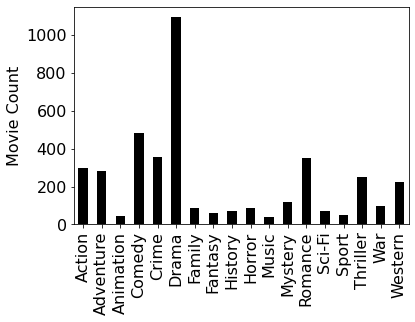

In [32]:
#q28
plot_dict(genrecensus, "Movie Count")

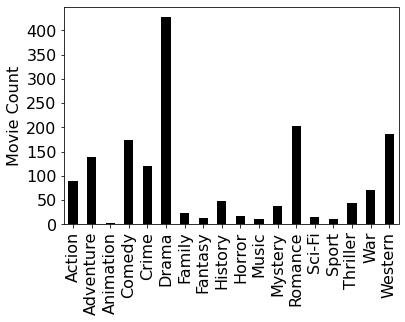

In [33]:
#q29
def bucketYearFilter(bucket, minYear, maxYear):
    filteredbuckets = {}
    for category in bucket:
        filteredlist = []
        movielist = bucket[category].copy()
        for movie in movielist:
            if type(maxYear) == int and movie["year"] > maxYear :
                continue
            elif type(minYear) == int and movie["year"]< minYear:
                continue
            filteredlist.append(movie)
        if len(filteredlist) != 0:
            filteredbuckets[category] = filteredlist
    return filteredbuckets
plot_dict(census(bucketYearFilter(genrebuckets,None,1969)), "Movie Count")

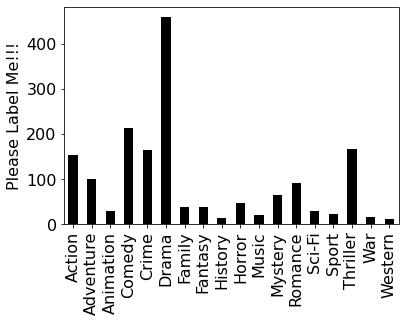

In [34]:
#q30
plot_dict(
    census(
        bucketYearFilter(
            genrebuckets,
            1990,
            None
)))

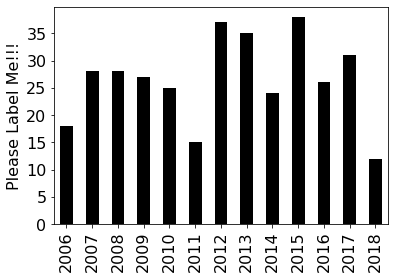

In [35]:
#q31
yearbuckets = bucketize(movies,"year")
plot_dict(census(bucketYearFilter(yearbuckets,2006,None)))

In [36]:
#q32
def years(buckets, actor):
    movies = buckets[actor]
    years = []

    for i in movies:
        years.append(i["year"])
    diff = max(years) - min(years)
    return diff

q32dict = {}
actorbuckets = bucketize(movies,"actors")

for i in actorbuckets:
    if years(actorbuckets,i) < 45:
        continue
    q32dict[i] = years(actorbuckets,i)
q32dict

{'Robert De Niro': 49,
 'Kurt Russell': 50,
 'John Wayne': 46,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Henry Fonda': 46,
 'Glenn Ford': 52,
 'Jeff Bridges': 48,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'Marlon Brando': 49,
 'Tony Curtis': 45,
 'Ernest Borgnine': 47,
 'Rod Steiger': 45,
 'George Burns': 60,
 'Bruce Dern': 45,
 'Dean Stockwell': 53}

In [37]:
#q33
directorbuckets = bucketize(movies,"directors")
q33dict = {}

for i in directorbuckets:
    if years(directorbuckets,i) < 25:
        continue
    q33dict[i] = years(directorbuckets,i)
q33dict

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'J. Lee Thompson': 28,
 'Henry Hathaway': 36,
 'John Ford': 25,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'John Sturges': 25,
 'Richard Fleischer': 32,
 'Don Siegel': 27,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Burt Kennedy': 25,
 'William A. Graham': 25,
 'Richard Thorpe': 29,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [38]:
#q34
q34dict = q32dict.copy()
q34list = []

while len(q34list) < 10:
    maxyears = max(q34dict.values())
    for i in q34dict:
        if q34dict[i] == maxyears:

            q34list.append(
                {
                    "name":i,
                    "span":q34dict[i]
                }
            )
            
            q34dict.pop(i)
            break
q34list

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [39]:
#q35
def rowRank(row):
    return row["span"]

def topSpans(spans, n):
    rows = []
    for name in spans:
        span = spans[name]
        rows.append({"name":name,"span":span})
        rows.sort(key=rowRank, reverse=True)
    return rows[:n]
topSpans(q33dict,21)

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31},
 {'name': 'Cecil B. DeMille', 'span': 30},
 {'name': 'Lee H. Katzin', 'span': 30},
 {'name': 'John Huston', 'span': 30},
 {'name': 'Robert Siodmak', 'span': 30},
 {'name': 'Richard Thorpe', 'span': 29},
 {'name': 'J. Lee Thompson', 'span': 28},
 {'name': 'Don Siegel', 'span': 27},
 {'name': 'John Ford', 'span': 25},
 {'name': 'John Sturges', 'span': 25},
 {'name': 'Burt Kennedy', 'span': 25},
 {'name': 'William A. Graham', 'span': 25}]

In [40]:
#q36
def medianRating(buckets, person):
    filmList = buckets[person]
    ratings = []

    for film in filmList:
        ratings.append(film["rating"])
    return median(ratings)

def bestRank(row):
    return row["rating"]
def best(bucket, n=-1):
    med = {} # short for median
    rows = []
    
    for name in bucket:
        med[name] = medianRating(bucket,name)

    for name in med:
        rating = med[name]
        rows.append({"name":name,"rating":rating,"count":len(bucket[name])})
        rows.sort(key=bestRank, reverse=True)
    return rows[:n]
        
bestActors = best(actorbuckets)
bestActors[:9]

[{'name': 'Heath Ledger', 'rating': 9.0, 'count': 1},
 {'name': 'John Fiedler', 'rating': 8.9, 'count': 1},
 {'name': 'Aldo Giuffrè', 'rating': 8.9, 'count': 1},
 {'name': 'Steven Williams', 'rating': 8.8, 'count': 1},
 {'name': 'Daniel Roebuck', 'rating': 8.8, 'count': 1},
 {'name': 'Joseph Gordon-Levitt', 'rating': 8.8, 'count': 1},
 {'name': 'Miyu Irino', 'rating': 8.6, 'count': 1},
 {'name': 'Andrew Kevin Walker', 'rating': 8.6, 'count': 1},
 {'name': 'Ken Watanabe', 'rating': 8.55, 'count': 2}]

In [41]:
#q37
bestDirectors = best(directorbuckets)
bestDirectors[:12]

[{'name': 'James Marlowe', 'rating': 8.8, 'count': 1},
 {'name': 'Kirk Wise', 'rating': 8.6, 'count': 1},
 {'name': 'David Fincher', 'rating': 8.6, 'count': 1},
 {'name': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'name': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'name': 'Adrian Molina', 'rating': 8.4, 'count': 1},
 {'name': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'name': 'Sergio Leone', 'rating': 8.3, 'count': 7},
 {'name': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'name': 'Moustapha Akkad', 'rating': 8.2, 'count': 1},
 {'name': 'Andrew Grieve', 'rating': 8.2, 'count': 6},
 {'name': 'Danny Boyle', 'rating': 8.2, 'count': 1}]

In [42]:
#q38
q38results = []
for name in bestActors:
    if name["count"] >= 5:
        q38results.append(name)
q38results[:14]

[{'name': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'name': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'name': 'Robert Lindsay', 'rating': 8.2, 'count': 6},
 {'name': 'Charles Chaplin', 'rating': 8.149999999999999, 'count': 10},
 {'name': 'Bradley Cooper', 'rating': 7.3, 'count': 5},
 {'name': 'Joe Pesci', 'rating': 7.2, 'count': 7},
 {'name': 'Robin Williams', 'rating': 7.2, 'count': 5},
 {'name': 'Kirk Douglas', 'rating': 7.15, 'count': 12},
 {'name': 'Ward Bond', 'rating': 7.1, 'count': 10},
 {'name': 'Gregory Peck', 'rating': 7.1, 'count': 5},
 {'name': 'Tom Hanks', 'rating': 7.1, 'count': 6},
 {'name': 'Al Pacino', 'rating': 7.050000000000001, 'count': 8},
 {'name': 'Ben Johnson', 'rating': 7.050000000000001, 'count': 6},
 {'name': 'Charles Coburn', 'rating': 7.0, 'count': 9}]

In [43]:
#q39
q39results = []
for name in bestActors:
    if name["count"] >= 30:
        q39results.append(name)
q39results[:16]

[{'name': 'Henry Fonda', 'rating': 6.9, 'count': 77},
 {'name': 'Mickey Rooney', 'rating': 6.7, 'count': 82},
 {'name': 'Anthony Quinn', 'rating': 6.7, 'count': 79},
 {'name': 'Brian Donlevy', 'rating': 6.7, 'count': 47},
 {'name': 'Robert Mitchum', 'rating': 6.65, 'count': 74},
 {'name': 'Glenn Ford', 'rating': 6.6, 'count': 74},
 {'name': 'George Sanders', 'rating': 6.6, 'count': 74},
 {'name': 'Robert De Niro', 'rating': 6.55, 'count': 74},
 {'name': 'Randolph Scott', 'rating': 6.5, 'count': 76},
 {'name': 'Jeff Bridges', 'rating': 6.5, 'count': 59},
 {'name': 'Ned Beatty', 'rating': 6.45, 'count': 50},
 {'name': 'Kurt Russell', 'rating': 6.4, 'count': 46},
 {'name': 'John Wayne', 'rating': 6.4, 'count': 130},
 {'name': 'John Cusack', 'rating': 6.4, 'count': 52},
 {'name': 'Danny Glover', 'rating': 6.4, 'count': 51},
 {'name': 'Dennis Quaid', 'rating': 6.35, 'count': 60}]

In [44]:
#q40
q40results = []
for name in bestDirectors:
    if name["count"] >=8:
        q40results.append(name)
q40results[:8]

[{'name': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'name': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'name': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'name': 'Charles Chaplin', 'rating': 8.1, 'count': 11},
 {'name': 'Hayao Miyazaki', 'rating': 8.1, 'count': 9},
 {'name': 'Martin Scorsese', 'rating': 8.0, 'count': 8},
 {'name': 'John Ford', 'rating': 7.3, 'count': 21},
 {'name': 'Fritz Lang', 'rating': 7.2, 'count': 9}]